# **User-user Collaborative Filtering**

---

RecSys Exercise 3, March 31, 2025

## **Overview**
During this exercise you will implement a user-user collaborative filtering algorithm in Python.

***Please upload in Moodle this notebook (executable and in PDF) with the code and answers to the posted questions. ***

## **Instructions**

Before you start just to remind the intuitive algorithm of the user-user collaborative filtering:



1.   Select neighbors - compare the current user’s ratings against every other user’s ratings by computing similarity (Pearson correlation).
2.   Identify the most similar users to a particular target user - top N neighbors by similarity
(correlation values: 1, the most similar user to −1, the least similar user).
3. Score items from neighbors’ ratings (create predictions for the target user based on the ratings of the top most similar users). In other words, predict the rating the current user would give to every item he has not yet rated.
4. Recommend to the target user the items with highest predicted rating - top N recommendations.



# **Task 1: User-User collaborative filtering without normalization**

For this task please use the dataset named `movie_ratings.csv`. The dataset is a 25 users x 100 movies matrix of ratings.

The dataset contains a significant number of missing values - do not replace these with zeros, they are correctly missing (those are movies which users hadn’t rate). Moreover some additional functions that will help in the development of the task have been implemented-


In [18]:
#Exercise 3: User-User Filtering
#Authors: Amin

import numpy as np
import pandas as pd
import math

#SupportFunctions

#This function receives the correlation values and a list of ratings, if  the rating is different than Nan
#the we multiply  the value of the correlations by the rating otherwise no. The sum of all the operations is returned.
def sumproduct(correlations, ratings):
    sum=0
    for i in range(len(list(correlations))):
       if not math.isnan(ratings[i]):
            sum=sum+(correlations[i]*ratings[i])
    return sum

#This function receives the correlation values and a list of ratings, if  the rating is different than Nan
#the we sum up the value of the correlations, otherwise no. The value of the sum is returned
def sumif(correlations, ratings):
    sum=0
    for i in range(len(list(correlations))):
        if not math.isnan(ratings[i]):
            sum=sum+correlations[i]
    return sum

#Implementation of the Not Normalized score rating function
def prediction_not_normalized(correlations,ratings):
    if sumif(correlations.values.reshape(5), ratings)>0:
        return sumproduct(correlations.values.reshape(5), ratings) / sumif(correlations.values.reshape(5), ratings)
    return np.nan


#**********************MAIN PROGRAM*******************************************************************
# read data
movie_ratings = pd.read_csv('movie-ratings.csv', header=0)
#copying datased for task 2
movie_ratings_weighted=movie_ratings.copy()
movie_ratings

,Movie,Pedro,Pablo,Arianna,Marcos,Arielle,Gio,Sofia,Moreno,Prisca,...,Vanessa,Ginger,Allan,Betty,Denisse,Ian,Ash,Misty,Brock,Tai
0,Star Wars: Episode IV - A New Hope (1977),NaN,4.5,5.0,4.5,4.0,4.0,NaN,5.0,4.0,...,4.0,NaN,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1,Finding Nemo (2003),NaN,5.0,5.0,NaN,4.0,4.0,4.5,4.5,4.0,...,4.0,NaN,3.5,4.0,2.0,3.5,NaN,NaN,NaN,3.5
2,Forrest Gump (1994),NaN,5.0,4.5,5.0,4.5,4.5,NaN,5.0,4.5,...,4.0,5.0,3.5,4.5,4.5,4.0,3.5,4.5,3.5,3.5
3,American Beauty (1999),NaN,4.0,NaN,NaN,NaN,NaN,4.5,2.0,3.5,...,4.0,NaN,3.5,4.5,3.5,4.0,NaN,3.5,NaN,NaN
4,Pirates of the Caribbean: The Curse of the Bla...,4.0,5.0,3.0,4.5,4.0,2.5,NaN,5.0,3.0,...,3.0,1.5,4.0,4.0,2.5,3.5,NaN,5.0,NaN,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,The Incredibles (2004),3.5,5.0,3.5,NaN,3.0,3.5,4.5,5.0,3.5,...,3.5,0.5,5.0,3.5,3.0,NaN,NaN,4.5,NaN,3.5
96,Beauty and the Beast (1991),3.0,5.0,NaN,NaN,4.0,3.5,NaN,2.0,4.0,...,4.0,NaN,4.0,2.0,2.5,NaN,NaN,4.0,NaN,NaN
97,X-Men (2000),NaN,4.5,NaN,NaN,4.0,NaN,4.5,5.0,4.0,...,3.5,NaN,3.0,4.0,3.5,NaN,NaN,NaN,3.0,4.0
98,X2: X-Men United (2003),3.5,4.0,NaN,NaN,3.5,NaN,4.5,4.5,4.0,...,3.5,NaN,2.0,NaN,3.0,4.0,NaN,3.5,NaN,4.0


A user-by-user correlations matrix has been calculated using the Pearson correlation model.
Note that all correlation values are between -1 and 1 and that the diagonal is all 1’s (since they are self-correlations).

In [19]:
#Calculating the pearson correlation among users
user_by_user_corr_matrix = movie_ratings.select_dtypes(include=['number']).corr(method='pearson')
user_by_user_corr_matrix

,Pedro,Pablo,Arianna,Marcos,Arielle,Gio,Sofia,Moreno,Prisca,Tue,...,Vanessa,Ginger,Allan,Betty,Denisse,Ian,Ash,Misty,Brock,Tai
Pedro,1.000000,0.402980,-0.142206,0.517620,0.300200,0.480537,-0.312412,0.383348,0.092775,0.098191,...,-0.191988,0.493008,0.360644,0.551089,0.002544,0.116653,-0.429183,0.394371,-0.304422,0.245048
Pablo,0.402980,1.000000,0.118979,0.057916,0.341734,0.241377,0.131398,0.206695,0.360056,0.033642,...,0.488607,0.328120,0.422236,0.226635,0.305803,0.037769,0.240728,0.411676,0.189234,0.390067
Arianna,-0.142206,0.118979,1.000000,-0.317063,0.294558,0.468333,0.092037,-0.045854,0.367568,-0.035394,...,0.373226,0.470972,0.069956,-0.054762,0.133812,0.015169,-0.273096,0.082528,0.667168,0.119162
Marcos,0.517620,0.057916,-0.317063,1.000000,-0.060913,-0.008066,0.462910,0.214760,0.169907,0.119350,...,-0.201275,0.228341,0.238700,0.259660,0.247097,0.149247,-0.361466,0.474974,-0.262073,0.166999
Arielle,0.300200,0.341734,0.294558,-0.060913,1.000000,0.282497,0.400275,0.264249,0.125193,-0.333602,...,0.174085,0.297977,0.476683,0.293868,0.438992,-0.162818,-0.295966,0.054518,0.464110,0.379856
Gio,0.480537,0.241377,0.468333,-0.008066,0.282497,1.000000,0.171151,0.072927,0.387133,0.146158,...,0.347470,0.399436,0.207314,0.311363,0.276306,0.079698,0.212991,0.165608,0.162314,0.279677
Sofia,-0.312412,0.131398,0.092037,0.462910,0.400275,0.171151,1.000000,0.065015,0.095623,-0.292501,...,0.016406,-0.240764,-0.115254,0.247693,0.166913,0.146011,0.009685,-0.451625,0.193660,0.113266
Moreno,0.383348,0.206695,-0.045854,0.214760,0.264249,0.072927,0.065015,1.000000,0.028529,-0.073252,...,0.049132,-0.009041,0.203613,0.033301,0.137982,0.070602,0.109452,-0.083562,-0.089317,0.229219
Prisca,0.092775,0.360056,0.367568,0.169907,0.125193,0.387133,0.095623,0.028529,1.000000,0.210879,...,0.475711,0.306957,0.136343,0.301750,0.143414,0.056100,0.179908,0.284648,0.170757,0.193131
Tue,0.098191,0.033642,-0.035394,0.119350,-0.333602,0.146158,-0.292501,-0.073252,0.210879,1.000000,...,-0.040606,0.155045,-0.204164,0.263654,0.167198,-0.084592,0.315712,0.085673,-0.109892,-0.279385



The top 5 closest neighbors (the users with the 5 largest, positive correlations) for user  **Sofia** have been identified: *Marcos* (corr: 0.46291), *Arielle* (corr: 0.400275), *Betty* (corr:
0.247693), *Eva* (corr: 0.22713), and *Brock* (corr: 0.19366). Don’t forget to exclude the target
user (corr: 1.0) from your possible selections.

The line of code used to this end is:


In [20]:
#The Top5 similar users for user Sofia, the highest the correlation value, the more similar. Observe that the dataframe
#has been sliced from the index 1, since in the index 0 the value will be 1.00 (self-correlation)
#To check the similar users of other users just change the label, e.g., user_by_user_corr_matrix.loc['Arielle']

corr_top5=(user_by_user_corr_matrix.loc['Sofia'].sort_values(ascending=False)[1:6]).to_frame().T
corr_top5

,Marcos,Arielle,Betty,Eva,Brock
Sofia,0.46291,0.400275,0.247693,0.22713,0.19366


**Top 5 closest neighbors of user Arielle**

Write down the top 5 closest neighbors for the user Arielle, you may use the code above

In [21]:
# Get the top 5 most similar users to 'Arielle' (excluding self-correlation)
top5_arielle = (
    user_by_user_corr_matrix.loc['Arielle']
    .sort_values(ascending=False)  # Sort by highest correlation first
    .iloc[1:6]  # Skip index 0 (self-correlation=1.0) and take next 5
    .to_frame()  # Convert to DataFrame for better display
    .T  # Transpose for horizontal display (optional)
)

print("Top 5 most similar users to 'Arielle':")
print(top5_arielle)

Top 5 most similar users to 'Arielle':
            Allan    Brock   Denisse     Sofia       Tai
Arielle  0.476683  0.46411  0.438992  0.400275  0.379856


In [22]:
print("All users in the dataset:", user_by_user_corr_matrix.columns.tolist())

All users in the dataset: ['Pedro', 'Pablo', 'Arianna', 'Marcos', 'Arielle', 'Gio', 'Sofia', 'Moreno', 'Prisca', 'Tue', 'Paula', 'Letty', 'James', 'Osito', 'Eva', 'Vanessa', 'Ginger', 'Allan', 'Betty', 'Denisse', 'Ian', 'Ash', 'Misty', 'Brock', 'Tai']


In [23]:
def get_top5_similar_users(corr_matrix, target_user):
    """
    Returns the top 5 most similar users to target_user,
    excluding self-correlation.

    Args:
        corr_matrix: User-user correlation matrix
        target_user: Name of user to find neighbors for

    Returns:
        DataFrame with top 5 similar users and their correlation scores
    """
    try:
        # Get correlations and sort descending
        user_correlations = corr_matrix[target_user].sort_values(ascending=False)

        # Exclude self-correlation (value = 1.0) and take top 5
        top5 = user_correlations.iloc[1:6].to_frame().T

        print(f"Top 5 similar users to {target_user}:")
        return top5

    except KeyError:
        available_users = corr_matrix.columns.tolist()
        print(f"Error: User '{target_user}' not found.")
        print(f"Available users: {available_users}")
        return None

> *Answer:*



The lines of code that follow were written to get the prediction score for movies, based on the following not normalized scoring model:

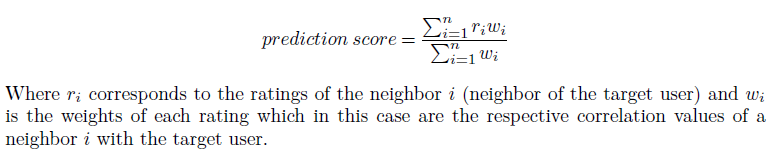


Keep in mind that if a user hadn’t rated an item, then the weights should not be considered
in the computations.


Try to understand the code and proceed to the next point.

In [24]:
#This function receives the correlation values and a list of ratings, if  the rating is different than Nan
#the we multiply  the value of the correlations by the rating otherwise no. The sum of all the operations is returned.
def sumproduct(correlations, ratings):
    sum=0
    for i in range(len(list(correlations))):
       if not math.isnan(ratings[i]):
            sum=sum+(correlations[i]*ratings[i])
    return sum

#This function receives the correlation values and a list of ratings, if  the rating is different than Nan
#the we sum up the value of the correlations, otherwise no. The value of the sum is returned
def sumif(correlations, ratings):
    sum=0
    for i in range(len(list(correlations))):
        if not math.isnan(ratings[i]):
            sum=sum+correlations[i]
    return sum

#Implementation of the Not Normalized score rating function
def prediction_not_normalized(correlations,ratings):
    if sumif(correlations.values.reshape(5), ratings)>0:
        return sumproduct(correlations.values.reshape(5), ratings) / sumif(correlations.values.reshape(5), ratings)
    return np.nan

**Top 3 recommendations for user Arielle**

In a real recommender system, we’d be excluding movies the user has already rated, but do not do this here. As an example, for the user Sofia, the correct submission would be:



1.  Top Movie: Requiem for a dream, prediction: 5.000
2.  2nd Movie: The Matrix, prediction: 4856
3.  3rd Movie: Back to the future, prediction: 4.739

The code to obtain these results is presented in the following:



In [25]:
#This list is basically to select the rating of the top5 users
selection_labels= ['Movie']+ corr_top5.columns.tolist()
#print(selection_labels)
#Here we are using the previous list to select the ratings
rating_top5=movie_ratings.loc[:,selection_labels]
#print(rating_top5)

#Empty list to store the results of the prediction scores
prediction_results = []

#We iterate over the rows of the top5 similar users ratings
for index, row in rating_top5.iterrows():
    #Getting the rating values for the movies of each user of the top 5
    ratings_row=row[selection_labels[1:]].values
    #Computing the prediction values, using the not normalized model. We call this function sending as parameters
    #the correlation values of the top 5 users and the ratings they have assigned to the items
    pred_value=prediction_not_normalized(corr_top5,ratings_row)
    #List with the results of the prediction, we add a new result in each iteration, one per each item
    prediction_results.append(pred_value)

#Adding a new column to our original DataFrame
movie_ratings['Prediction']=prediction_results

#Visualizing the items sorted from highest prediction score to lowest
#We should recommend the items with the highest prediction score
print(movie_ratings.sort_values(by='Prediction', ascending=False))


                              Movie  Pedro  Pablo  Arianna  Marcos  Arielle  \
55       Requiem for a Dream (2000)    NaN    4.5      NaN     NaN      NaN   
50                The Matrix (1999)    4.5    5.0      5.0     5.0      5.0   
11        Back to the Future (1985)    4.5    5.0      5.0     NaN      NaN   
12                    Snatch (2000)    NaN    NaN      NaN     5.0      NaN   
21           The Dark Knight (2008)    5.0    5.0      NaN     5.0      5.0   
..                              ...    ...    ...      ...     ...      ...   
32                     Fargo (1996)    NaN    5.0      NaN     NaN      NaN   
45        Dances with Wolves (1990)    NaN    NaN      NaN     NaN      NaN   
62             Almost Famous (2000)    NaN    3.5      NaN     NaN      NaN   
92  Clear and Present Danger (1994)    NaN    NaN      NaN     NaN      NaN   
93               Unbreakable (2000)    NaN    NaN      NaN     NaN      NaN   

    Gio  Sofia  Moreno  Prisca  ...  Ginger  Allan 

In [26]:
#Write the code to compute the recommendations for user Arielle her

In [27]:
unrated_by_arielle = movie_ratings[movie_ratings['Arielle'].isna()]


recommendations_for_arielle = unrated_by_arielle.sort_values(by='Prediction', ascending=False)


print("Recommended movies for Arielle:")
print(recommendations_for_arielle[['Movie', 'Prediction']].head(20))

Recommended movies for Arielle:
                                           Movie  Prediction
55                    Requiem for a Dream (2000)    5.000000
11                     Back to the Future (1985)    4.739173
12                                 Snatch (2000)    4.651432
8                                 Memento (2000)    4.494735
3                         American Beauty (1999)    4.260827
38                       Schindler's List (1993)    4.230115
53                     The Usual Suspects (1995)    4.158179
25                                 Amelie (2001)    4.144850
82                               Stargate (1994)    4.079542
31               The Silence of the Lambs (1991)    4.000000
17              O Brother Where Art Thou? (2000)    4.000000
20                    Lost in Translation (2003)    3.990346
6   Eternal Sunshine of the Spotless Mind (2004)    3.949931
18                           Donnie Darko (2001)    3.845496
64                   Seven (a.k.a. Se7en) (1995)    3

In [28]:

# Get top 5 most similar users to Arielle (excluding herself)
top5_similar_users = (
    user_by_user_corr_matrix['Arielle']              # Get Arielle's correlations
    .drop('Arielle')                                # Remove self-correlation
    .nlargest(5)                                    # Top 5 highest correlations
    .to_frame().T                                   # Convert to DataFrame (1 row)
    .rename(index={'Arielle': 'Similarity Score'})  # Rename for clarity
)

print("Top 5 Most Similar Users to Arielle:")
print(top5_similar_users)

Top 5 Most Similar Users to Arielle:
                     Allan    Brock   Denisse     Sofia       Tai
Similarity Score  0.476683  0.46411  0.438992  0.400275  0.379856


In [29]:
import numpy as np
import pandas as pd
import math

# Support Functions
def sumproduct(correlations, ratings):
    sum = 0
    for i in range(len(list(correlations))):
       if not math.isnan(ratings[i]):
            sum = sum + (correlations[i] * ratings[i])
    return sum

def sumif(correlations, ratings):
    sum = 0
    for i in range(len(list(correlations))):
        if not math.isnan(ratings[i]):
            sum = sum + correlations[i]
    return sum

def prediction_not_normalized(correlations, ratings):
    if sumif(correlations.values.reshape(5), ratings) > 0:
        return sumproduct(correlations.values.reshape(5), ratings) / sumif(correlations.values.reshape(5), ratings)
    return np.nan

# 1. Load the data
movie_ratings = pd.read_csv('movie-ratings.csv', header=0)

# 2. Calculate user-user correlation matrix (EXCLUDE 'Movie' column)
user_ratings_only = movie_ratings.drop('Movie', axis=1)  # Remove movie title column
user_by_user_corr_matrix = user_ratings_only.corr(method='pearson')

# 3. Find top 5 similar users for Arielle
corr_top5_arielle = (user_by_user_corr_matrix.loc['Arielle'].sort_values(ascending=False)[1:6]).to_frame().T
print("Top 5 similar users for Arielle:")
print(corr_top5_arielle)

# 4. Get top 3 recommendations for Arielle
selection_labels_arielle = ['Movie'] + corr_top5_arielle.columns.tolist()
rating_top5_arielle = movie_ratings.loc[:, selection_labels_arielle]

prediction_results_arielle = []
for index, row in rating_top5_arielle.iterrows():
    ratings_row = row[selection_labels_arielle[1:]].values  # Exclude 'Movie' column for ratings
    pred_value = prediction_not_normalized(corr_top5_arielle, ratings_row)
    prediction_results_arielle.append(pred_value)

movie_ratings_arielle = movie_ratings.copy()
movie_ratings_arielle['Prediction'] = prediction_results_arielle

# Remove rows where prediction is NaN (no valid ratings from similar users)
top_recommendations = movie_ratings_arielle.dropna(subset=['Prediction']).sort_values(by='Prediction', ascending=False).head(3)

print("\nTop 3 recommendations for Arielle:")
print(top_recommendations[['Movie', 'Prediction']])

Top 5 similar users for Arielle:
            Allan    Brock   Denisse     Sofia       Tai
Arielle  0.476683  0.46411  0.438992  0.400275  0.379856

Top 3 recommendations for Arielle:
                                                Movie  Prediction
77  Star Wars: Episode V - The Empire Strikes Back...    4.760291
21                             The Dark Knight (2008)    4.551454
16  The Lord of the Rings: The Return of the King ...    4.507637


# **Task 2: User-User collaborative filtering with normalized ratings**

In this task you will perform similar steps as in Task 1, but this time you will normalize the ratings:

1.  Write the necessary lines of code to compute the prediction score for each movie, by following the next model:

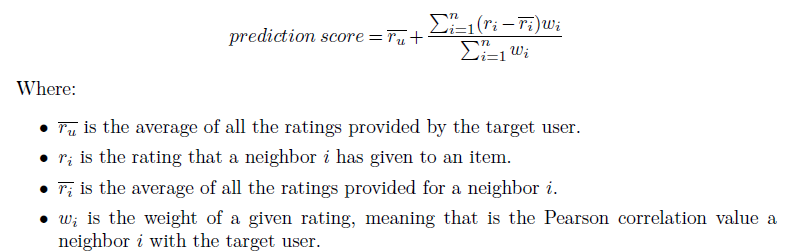



*Important:* Remember that there are items that have not being rated by certain users (NaN values), you must not consider them in the computations.
Feel free to write your own functions to accomplish this point.

Add comments in the code to explain your solution.

In [30]:
import pandas as pd
import numpy as np
from math import isnan

def compute_weighted_prediction(similarities, neighbor_ratings, neighbor_avg_ratings, user_avg_rating):
    """
    Computes normalized weighted prediction for a target user.
    Ignores NaN values in neighbor ratings.
    """
    weighted_sum = 0.0
    similarity_sum = 0.0

    for idx in range(len(neighbor_ratings)):
        current_rating = neighbor_ratings[idx]
        if not isnan(current_rating):
            rating_deviation = current_rating - neighbor_avg_ratings[idx]
            similarity_weight = similarities[idx]
            weighted_sum += rating_deviation * similarity_weight
            similarity_sum += abs(similarity_weight)

    return user_avg_rating + (weighted_sum / similarity_sum) if similarity_sum > 0 else np.nan

def get_top_neighbors(user_corr_matrix, target_user, n_neighbors=5):
    """Returns top N most similar users and their correlation values."""
    user_similarities = user_corr_matrix[target_user].drop(index=target_user)
    top_users = user_similarities.nlargest(n_neighbors)
    return top_users.index.tolist(), top_users.values

def generate_predictions(movie_data, target_user):
    """Generates rating predictions for a target user."""
    user_mean_rating = movie_data[target_user].mean()

    # Compute pairwise user correlations
    user_correlation = movie_data.drop(columns='Movie').corr(method='pearson')

    # Identify most similar users
    neighbors, neighbor_similarities = get_top_neighbors(user_correlation, target_user)
    neighbor_mean_ratings = [movie_data[user].mean() for user in neighbors]

    # Prepare prediction DataFrame
    prediction_results = pd.DataFrame()
    prediction_results['Movie'] = movie_data['Movie']

    # Calculate predictions per movie
    movie_predictions = []
    for _, movie_row in movie_data[['Movie'] + neighbors].iterrows():
        neighbor_ratings = movie_row[neighbors].values
        pred = compute_weighted_prediction(
            neighbor_similarities,
            neighbor_ratings,
            neighbor_mean_ratings,
            user_mean_rating
        )
        movie_predictions.append(pred)

    return movie_predictions

# Main execution
if __name__ == "__main__":
    # Assuming movie_ratings is loaded elsewhere
    all_predictions = pd.DataFrame()
    all_predictions['Movie'] = movie_ratings['Movie']

    for current_user in movie_ratings.columns.drop('Movie'):
        print(f"Generating predictions for: {current_user}")
        all_predictions[current_user] = generate_predictions(movie_ratings, current_user)

Generating predictions for: Pedro
Generating predictions for: Pablo
Generating predictions for: Arianna
Generating predictions for: Marcos
Generating predictions for: Arielle
Generating predictions for: Gio
Generating predictions for: Sofia
Generating predictions for: Moreno
Generating predictions for: Prisca
Generating predictions for: Tue
Generating predictions for: Paula
Generating predictions for: Letty
Generating predictions for: James
Generating predictions for: Osito
Generating predictions for: Eva
Generating predictions for: Vanessa
Generating predictions for: Ginger
Generating predictions for: Allan
Generating predictions for: Betty
Generating predictions for: Denisse
Generating predictions for: Ian
Generating predictions for: Ash
Generating predictions for: Misty
Generating predictions for: Brock
Generating predictions for: Tai


2.   Provide the top 3 recommendations for the user *Arielle* and the corresponding prediction values, in a similar manner Task 1.

In [31]:
#Write your code here
import pandas as pd

def get_unrated_movies(ratings_df, user_name):
    """Returns movies not yet rated by the specified user"""
    return ratings_df[ratings_df[user_name].isna()]['Movie']

def get_user_predictions(prediction_df, movie_list):
    """Filters predictions for specified movies"""
    return prediction_df[prediction_df['Movie'].isin(movie_list)]

def generate_top_recommendations(user_preds, user_name, n=3):
    """Returns top N recommendations sorted by predicted rating"""
    return (user_preds[['Movie', user_name]]
            .sort_values(by=user_name, ascending=False)
            .head(n))

# Main execution
if __name__ == "__main__":
    # Get movies Arielle hasn't rated
    arielle_unrated = get_unrated_movies(movie_ratings, 'Arielle')

    # Filter predictions for these movies
    arielle_preds = get_user_predictions(all_predictions, arielle_unrated)

    # Get top 3 recommendations
    top3_for_arielle = generate_top_recommendations(arielle_preds, 'Arielle')

    # Display results
    print("Top 3 movie recommendations for Arielle:")
    print(top3_for_arielle.to_string(index=False))

Top 3 movie recommendations for Arielle:
                      Movie  Arielle
             Memento (2000) 4.777803
               Fargo (1996) 4.771538
Seven (a.k.a. Se7en) (1995) 4.655569


> *Answer:*



3. Now that you have completed the tasks, please answer the following:

* Are there differences in the recommendations obtained in both approaches?
> *Answer:* Task 1’s predictions can be skewed by users who consistently rate higher or lower, leading to biased recommendations. Task 2 addresses this by normalizing ratings relative to each user’s average, resulting in more balanced and personalized suggestions. The mean-centered approach in Task 2 reduces rating bias and improves fairness.

* In case of differences, which top 3 do you consider as ’best’ recommendation for the user *Arielle*?
> *Answer:*Memento,Fargo,Seven.

* In which situation would you use a non-normalized approach and in which a normalized approach?
> *Answer:*A non-normalized approach is suitable when users exhibit similar rating behaviors and the dataset is dense with consistent rating scales. This method works well in scenarios where all users interpret and apply ratings uniformly, such as in controlled surveys or expert evaluations. In contrast, a normalized approach is preferable when users display varying rating tendencies—some consistently rate high while others rate low—or when dealing with sparse datasets. Normalization adjusts for these individual biases by centering ratings around each user’s mean, leading to fairer and more accurate predictions. This makes it ideal for real-world platforms with diverse user bases, such as e-commerce or movie streaming services, where personalization and bias correction are critical.

* Which other correlation models could you use to find user neighbors?
> *Answer:*
Cosine Similarity – Measures angle between rating vectors, useful for sparse data.

Spearman’s Rank – Compares rating ranks instead of values, robust to outliers.

Jaccard Index – Checks overlap in rated items, ideal for binary data (e.g., likes/dislikes).

Adjusted Cosine – Centers ratings by user means before applying cosine, reducing bias.

